In [58]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

## Introduction to Pandas

**pandas** is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming **the most powerful and flexible open source data analysis / manipulation tool available in any language**. It is already well on its way toward this goal.

pandas is well suited for many different kinds of data:
* Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
* Ordered and unordered (not necessarily fixed-frequency) time series data.
* Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
* Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure

The two primary data structures of pandas - *Series* (1-dimensional) and *DataFrame* (2-dimensional), handle the vast majority of typical use cases in finance, statistics, social science, and many areas of engineering. For R users, DataFrame provides everything that R’s data.frame provides and much more. pandas is built on top of NumPy and is intended to integrate well within a scientific computing environment with many other 3rd party libraries.

Here are just a few of the things that pandas does well:
* Easy handling of missing data (represented as NaN) in floating point as well as non-floating point data
* Size mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects
* Powerful, flexible group by functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets
* Intuitive merging and joining data sets
* Flexible reshaping and pivoting of data sets
* Robust IO tools for loading data from flat files (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format
* Time series-specific functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

Many of these principles are here to address the shortcomings frequently experienced using other languages / scientific research environments. For data scientists, working with data is typically divided into multiple stages: munging and cleaning data, analyzing / modeling it, then organizing the results of the analysis into a form suitable for plotting or tabular display. pandas is the ideal tool for all of these tasks.

Some other notes
* **pandas** is fast. Many of the low-level algorithmic bits have been extensively tweaked in Cython code. However, as with anything else generalization usually sacrifices performance. So if you focus on one feature for your application you may be able to create a faster specialized tool.
* pandas is a dependency of statsmodels, making it an important part of the statistical computing ecosystem in Python.
* pandas has been used extensively in production in financial applications.

<br>

## Representation

All data is loaded directly into the RAM and is optimised to use memory efficiently. The data in memory can be thought of as below:

| column 1 | column 2 | column 3 |
| -------- | -------- | -------- |
| Allen | Varghese | Male |
| Kevin | O'Brien | Male |
| Mihai | Todor | Male |


The main data structure in **pandas** is **DataFrame** which manages data in the above format and is accessible for computation as a python **dictionary**. Lets create the above information as a pandas dataframe.

In [59]:
# Create a python dictionary
data = {
    "column1": ["Allen", "Kevin", "Mihai"],
    "column2": ["Varghese", "O'Brien", "Todor"],
    "column3": ["Male", "Male", "Male"],
    "some_random_numbers": [4200, 2750, 3820]
}

# Create the DataFrame
df = pd.DataFrame(data)
df

,column1,column2,column3,some_random_numbers
0,Allen,Varghese,Male,4200
1,Kevin,O'Brien,Male,2750
2,Mihai,Todor,Male,3820


An `index` column is added automatically by pandas. This is to keep track of rows and for fast manipulation of data by easy slicing. Individual rows can be accessed by the index.

In [60]:
df.loc[1]

column1                  Kevin
column2                O'Brien
column3                   Male
some_random_numbers       2750
Name: 1, dtype: object

In [64]:
df["column1"]

0    Allen
1    Kevin
2    Mihai
Name: column1, dtype: object

In [66]:
df["column1"].values

array(['Allen', 'Kevin', 'Mihai'], dtype=object)

In [65]:
df["column1"].tolist()

['Allen', 'Kevin', 'Mihai']

**NOTE:** Data in a pandas DataFrame is linked as a collection of columns rather than a collection of rows. Thus it is very
fast to access and manipulate data in columns rather than rows. It is important to use appropriate data modelling
techniques to convert available data into a more accessible format

<br>

## Inspecting DataFrames

Below are some useful DataFrame inspection functions

In [67]:
# Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
column1                3 non-null object
column2                3 non-null object
column3                3 non-null object
some_random_numbers    3 non-null int64
dtypes: int64(1), object(3)
memory usage: 176.0+ bytes


In [68]:
# Get the list of columns
df.columns

Index(['column1', 'column2', 'column3', 'some_random_numbers'], dtype='object')

In [69]:
# Get the index
df.index

RangeIndex(start=0, stop=3, step=1)

In [70]:
# Sneak peek
df.head()

,column1,column2,column3,some_random_numbers
0,Allen,Varghese,Male,4200
1,Kevin,O'Brien,Male,2750
2,Mihai,Todor,Male,3820


In [72]:
df.head(1)

,column1,column2,column3,some_random_numbers
0,Allen,Varghese,Male,4200


In [77]:
# Summary Statistics
df.describe()

,some_random_numbers
count,3.000000
mean,3590.000000
std,751.864349
min,2750.000000
25%,3285.000000
50%,3820.000000
75%,4010.000000
max,4200.000000


In [78]:
df.describe().loc["25%"]

some_random_numbers    3285.0
Name: 25%, dtype: float64

In [79]:
# Number of rows in a DataFrame
len(df)

3

For looking up details about a DataFrame or a function use "dir" or "help"

In [80]:
dir(df)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__invert__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__

In [81]:
help(df.loc)

Help on _LocIndexer in module pandas.core.indexing object:

class _LocIndexer(_LocationIndexer)
 |  Purely label-location based indexer for selection by label.
 |  
 |  ``.loc[]`` is primarily label based, but may also be used with a
 |  boolean array.
 |  
 |  Allowed inputs are:
 |  
 |  - A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
 |    interpreted as a *label* of the index, and **never** as an
 |    integer position along the index).
 |  - A list or array of labels, e.g. ``['a', 'b', 'c']``.
 |  - A slice object with labels, e.g. ``'a':'f'`` (note that contrary
 |    to usual python slices, **both** the start and the stop are included!).
 |  - A boolean array.
 |  
 |  ``.loc`` will raise a ``KeyError`` when the items are not found.
 |  
 |  See more at :ref:`Selection by Label <indexing.label>`
 |  
 |  Method resolution order:
 |      _LocIndexer
 |      _LocationIndexer
 |      _NDFrameIndexer
 |      builtins.object
 |  
 |  Methods inherited from _LocationIndex

<br>

## Manipulating Data

Adding and removing columns from a DataFrame can be done on the fly and makes data manipulation very easy

In [82]:
df

,column1,column2,column3,some_random_numbers
0,Allen,Varghese,Male,4200
1,Kevin,O'Brien,Male,2750
2,Mihai,Todor,Male,3820


In [83]:
df["Location"] = ["Dublin", "Limerick", "Dublin"]
df

,column1,column2,column3,some_random_numbers,Location
0,Allen,Varghese,Male,4200,Dublin
1,Kevin,O'Brien,Male,2750,Limerick
2,Mihai,Todor,Male,3820,Dublin


A subset of columns can be extracted from a DataFrame to remove extra columns

In [84]:
name_df = df[["column1", "column2"]]
name_df

,column1,column2
0,Allen,Varghese
1,Kevin,O'Brien
2,Mihai,Todor


In [85]:
# Rename columns
name_df = name_df.rename(
    columns={
        "column1": "First Name",
        "column2": "Last Name"
    }
)
name_df

,First Name,Last Name
0,Allen,Varghese
1,Kevin,O'Brien
2,Mihai,Todor


In [89]:
# Extract the 1st letter of first name
name_df["FN_1"] = name_df["First Name"].map(lambda x: x[0])
name_df

,First Name,Last Name,FN_1
0,Allen,Varghese,A
1,Kevin,O'Brien,K
2,Mihai,Todor,M


In [90]:
# TODO: Extract the last 3 letters of Last Name in a new column "LN_3"
name_df["LN_3"] = name_df["Last Name"].map(lambda x: x[-3:])
name_df

,First Name,Last Name,FN_1,LN_3
0,Allen,Varghese,A,ese
1,Kevin,O'Brien,K,ien
2,Mihai,Todor,M,dor


<br>
## Load Data

Data can be loaded from external sources like CSV files, Excel and databases.

In [91]:
csv_df = pd.read_csv("datasets/weather_2012.csv")
csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
Date/Time             8784 non-null object
Temp (C)              8784 non-null float64
Dew Point Temp (C)    8784 non-null float64
Rel Hum (%)           8784 non-null int64
Wind Spd (km/h)       8784 non-null int64
Visibility (km)       8784 non-null float64
Stn Press (kPa)       8784 non-null float64
Weather               8784 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [92]:
csv_df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [95]:
csv_df["Weather"].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog', 'Thunderstorms,Moderate Rain Showers,Fog',
       'Rain Showers,Fog', 'Rain Showers,Snow Showers', 'Snow Pellets',
       'Rain,Snow,Fog', 'Moderate Rain,Fog',
       'Freezing Rain,Ice Pellets,Fog', 'Drizzle,Ice Pellets,Fog',
       'Drizzle,Snow', 'Rain,Ice Pellets', 'Drizzle,Snow,Fog',
       

<br>

## Filtering data

In [97]:
csv_df["Weather"].str.contains("Rain")

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18       True
19       True
20      False
21      False
22       True
23      False
24       True
25      False
26      False
27      False
28      False
29      False
        ...  
8754    False
8755    False
8756    False
8757    False
8758    False
8759    False
8760    False
8761    False
8762    False
8763    False
8764    False
8765    False
8766    False
8767    False
8768    False
8769    False
8770    False
8771    False
8772    False
8773    False
8774    False
8775    False
8776    False
8777    False
8778    False
8779    False
8780    False
8781    False
8782    False
8783    False
Name: Weather, dtype: bool

In [98]:
csv_df["Weather"][csv_df["Weather"].str.contains("Rain")]

18                               Rain
19                               Rain
22                       Rain Showers
24                       Rain Showers
153                 Freezing Rain,Fog
154                     Freezing Rain
157                     Freezing Rain
221                         Rain,Snow
296                     Freezing Rain
297         Freezing Rain,Snow Grains
299                     Freezing Rain
404                     Freezing Rain
405                     Freezing Rain
406                     Freezing Rain
407                 Freezing Rain,Fog
542                              Rain
543                              Rain
545                              Rain
546                          Rain,Fog
547                          Rain,Fog
552                              Rain
554                              Rain
555                              Rain
566                              Rain
631                     Freezing Rain
632                     Freezing Rain
633         

In [99]:
csv_df["Weather"][csv_df["Weather"].str.contains("Rain")].head(1)

18    Rain
Name: Weather, dtype: object

In [96]:
# Find only "Rain" weather reports
csv_df["Weather"][csv_df["Weather"].str.contains("Rain")].unique()

array(['Rain', 'Rain Showers', 'Freezing Rain,Fog', 'Freezing Rain',
       'Rain,Snow', 'Freezing Rain,Snow Grains', 'Rain,Fog',
       'Freezing Rain,Haze', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Rain,Snow,Fog', 'Moderate Rain,Fog',
       'Freezing Rain,Ice Pellets,Fog', 'Rain,Ice Pellets',
       'Rain,Snow Grains', 'Rain,Snow,Ice Pellets'], dtype=object)

In [101]:
# Find rows that has weather value as "Fog"
csv_df[csv_df["Weather"] == "Fog"]

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog
7,2012-01-01 07:00:00,-1.4,-3.6,85,7,8.0,101.26,Fog
8,2012-01-01 08:00:00,-1.4,-3.6,85,9,8.0,101.23,Fog
9,2012-01-01 09:00:00,-1.3,-3.1,88,15,4.0,101.20,Fog
10,2012-01-01 10:00:00,-1.0,-2.3,91,9,1.2,101.15,Fog
11,2012-01-01 11:00:00,-0.5,-2.1,89,7,4.0,100.98,Fog


In [102]:
# Find rows where temperature is more than 10 deg C
csv_df[(csv_df["Temp (C)"] > 10.0) & (csv_df["Weather"].isin(["Cloudy", "Clear"]))]

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
1615,2012-03-08 07:00:00,10.3,0.8,52,26,48.3,100.47,Cloudy
1617,2012-03-08 09:00:00,10.2,1.6,55,26,48.3,100.29,Cloudy
1618,2012-03-08 10:00:00,12.1,2.9,53,30,24.1,100.22,Cloudy
1619,2012-03-08 11:00:00,12.7,3.8,55,26,24.1,100.13,Cloudy
1621,2012-03-08 13:00:00,11.5,5.2,65,20,24.1,99.99,Cloudy
1622,2012-03-08 14:00:00,11.7,5.9,68,26,24.1,99.88,Cloudy
1695,2012-03-11 15:00:00,10.5,-1.3,44,20,48.3,101.69,Clear
1696,2012-03-11 16:00:00,10.9,-0.7,45,15,48.3,101.65,Clear
1697,2012-03-11 17:00:00,10.7,-0.6,45,11,48.3,101.65,Clear
1715,2012-03-12 11:00:00,10.6,0.3,49,6,24.1,101.99,Cloudy


In [103]:
# Group by on "Weather" column and count the number of records for each category
weather_grpby = csv_df.groupby("Weather")["Dew Point Temp (C)"].count()
weather_grpby

Weather
Clear                                      1326
Cloudy                                     1728
Drizzle                                      41
Drizzle,Fog                                  80
Drizzle,Ice Pellets,Fog                       1
Drizzle,Snow                                  2
Drizzle,Snow,Fog                             15
Fog                                         150
Freezing Drizzle                              7
Freezing Drizzle,Fog                          6
Freezing Drizzle,Haze                         3
Freezing Drizzle,Snow                        11
Freezing Fog                                  4
Freezing Rain                                14
Freezing Rain,Fog                             4
Freezing Rain,Haze                            2
Freezing Rain,Ice Pellets,Fog                 1
Freezing Rain,Snow Grains                     1
Haze                                         16
Mainly Clear                               2106
Moderate Rain,Fog               

In [104]:
# Group by on "Weather" column and count the number of records for each category
weather_grpby = csv_df.groupby("Weather", as_index=False)["Dew Point Temp (C)"].count()
weather_grpby

,Weather,Dew Point Temp (C)
0,Clear,1326
1,Cloudy,1728
2,Drizzle,41
3,"Drizzle,Fog",80
4,"Drizzle,Ice Pellets,Fog",1
5,"Drizzle,Snow",2
6,"Drizzle,Snow,Fog",15
7,Fog,150
8,Freezing Drizzle,7
9,"Freezing Drizzle,Fog",6


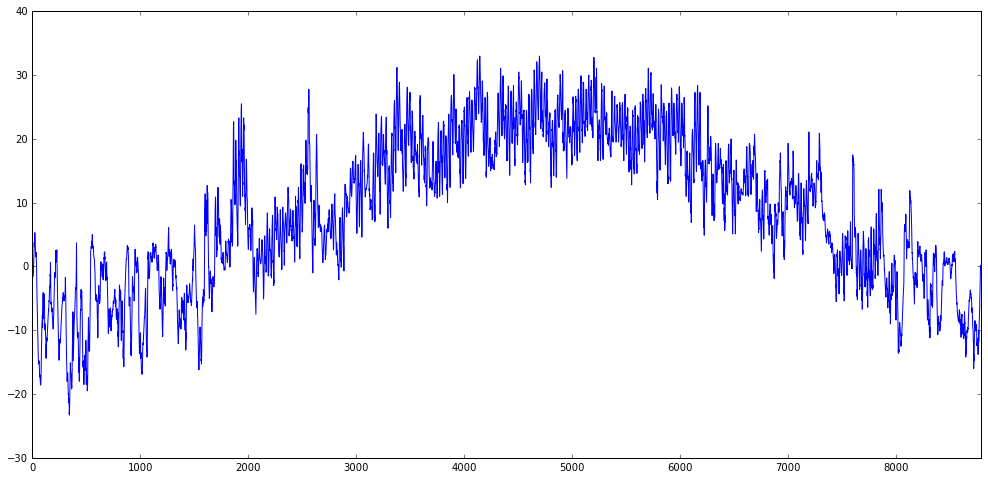

In [105]:
# Plot a line graph for "Temp (C)" field

# Plot function by default creates a "line" graph.
# The figure size is set for (width, height) in inches
csv_df["Temp (C)"].plot(figsize=(17, 8))

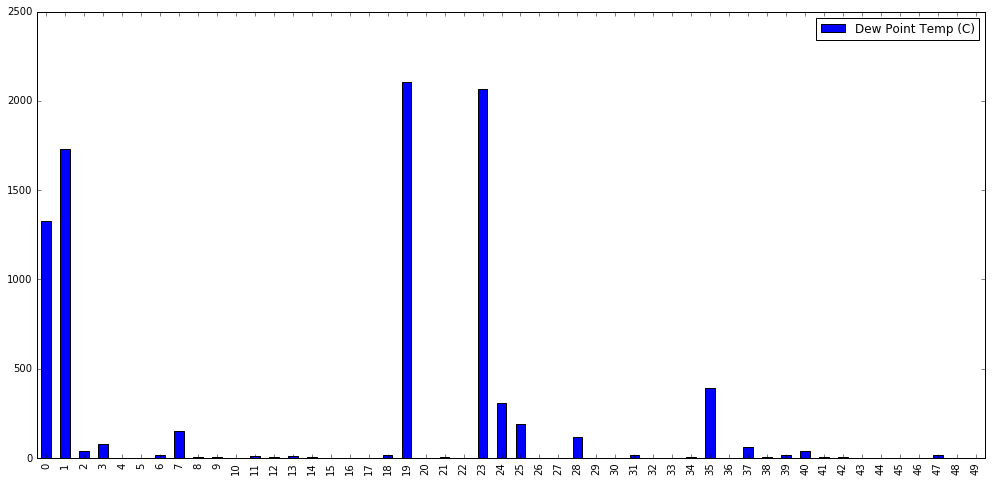

In [109]:
# Use the groupby result from earlier to find the weather with highest number of records
weather_grpby.plot(kind="bar", figsize=(17, 8))

In [110]:
bikes = pd.read_csv(
    'datasets/bikes.csv', sep=';', encoding='latin1',
    parse_dates=['Date'], dayfirst=True, index_col='Date'
)
bikes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 310 entries, 2012-01-01 to 2012-11-05
Data columns (total 9 columns):
Berri 1                                310 non-null int64
Brébeuf (données non disponibles)      0 non-null float64
Côte-Sainte-Catherine                  310 non-null int64
Maisonneuve 1                          310 non-null int64
Maisonneuve 2                          310 non-null int64
du Parc                                310 non-null int64
Pierre-Dupuy                           310 non-null int64
Rachel1                                310 non-null int64
St-Urbain (données non disponibles)    0 non-null float64
dtypes: float64(2), int64(7)
memory usage: 24.2 KB


In [111]:
bikes.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


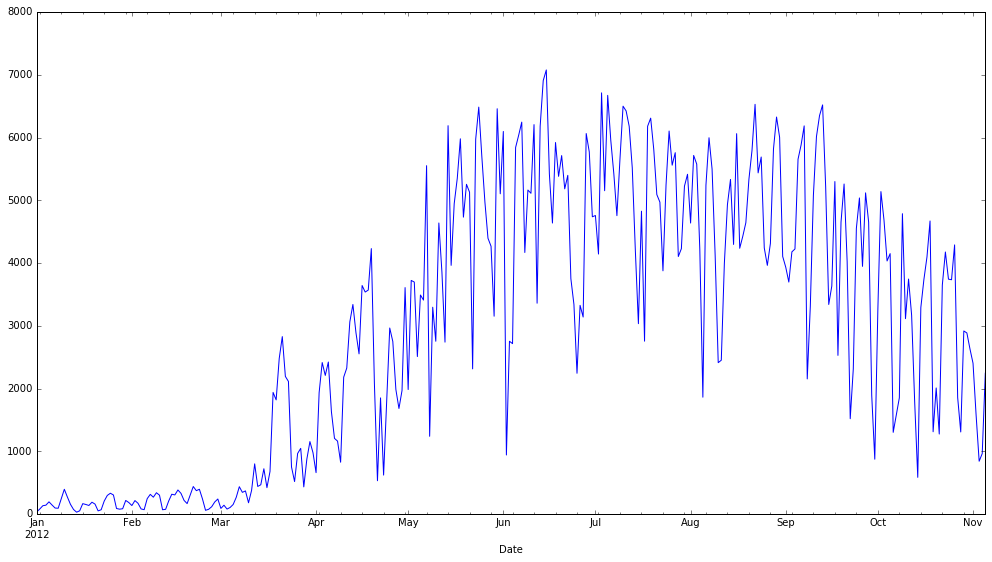

In [112]:
bikes["Berri 1"].plot(figsize=(17, 9))

In [113]:
# Make a copy of only the "Berri 1" data
berri_bikes = bikes[['Berri 1']].copy()
berri_bikes.head()

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


Next, we need to add a 'weekday' column. Firstly, we can get the weekday from the index. It's basically all the days of the year. Pandas has a bunch of really great time series functionality, so if we wanted to get the day of the month for each row, we could do it like this:

In [114]:
berri_bikes.index.day

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13

We actually want the weekday, though:

In [115]:
berri_bikes.index.weekday

array([6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
       6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5,

These are the days of the week, where 0 is Monday. I found out that 0 was Monday by checking on a calendar.
Now that we know how to get the weekday, we can add it as a column in our dataframe like this:

In [116]:
#berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday
berri_bikes["weekday"] = berri_bikes.index.weekday

#berri_bikes[:5]
berri_bikes.head()

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


Adding up cyclists by weekday

In [117]:
weekday_counts = berri_bikes.groupby('weekday').sum()
weekday_counts

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


It's hard to remember what 0, 1, 2, 3, 4, 5, 6 mean, so we can fix it up and graph it:

In [119]:
weekday_counts.index = [
    'Monday', 'Tuesday', 'Wednesday', 'Thursday',
    'Friday', 'Saturday', 'Sunday'
]
weekday_counts

,Berri 1
Monday,134298
Tuesday,135305
Wednesday,152972
Thursday,160131
Friday,141771
Saturday,101578
Sunday,99310


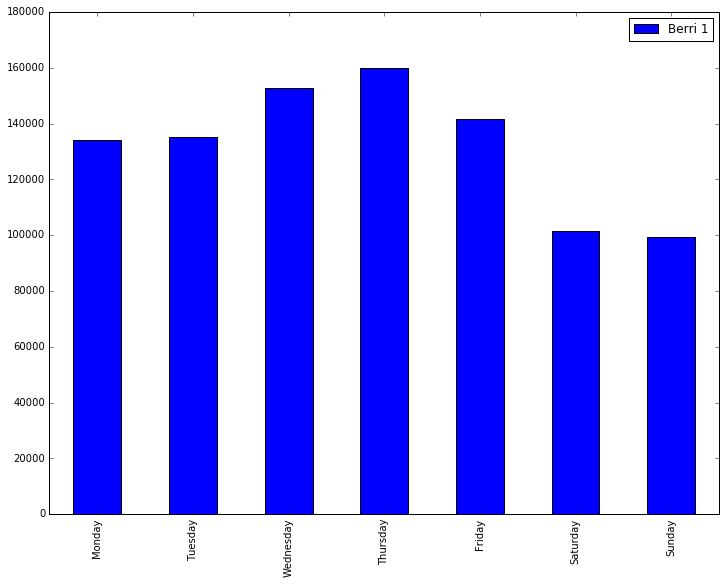

In [120]:
weekday_counts.plot(kind='bar', figsize=(12, 9))

In [121]:
# TODO: Repeat the above exercise with Month

In [122]:
berri_bikes.index.month

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8

In [123]:
berri_bikes["month"] = berri_bikes.index.month
berri_bikes

,Berri 1,weekday,month
Date,,,
2012-01-01,35,6,1
2012-01-02,83,0,1
2012-01-03,135,1,1
2012-01-04,144,2,1
2012-01-05,197,3,1
2012-01-06,146,4,1
2012-01-07,98,5,1
2012-01-08,95,6,1
2012-01-09,244,0,1


In [124]:
month_counts = berri_bikes.groupby("month").sum()
month_counts

,Berri 1,weekday
month,,
1,4915,91
2,6712,86
3,26229,96
4,67699,90
5,133274,90
6,144849,93
7,162562,91
8,149227,93
9,127061,95


In [125]:
month_counts.index = [
    "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November"
]
month_counts

,Berri 1,weekday
January,4915,91
February,6712,86
March,26229,96
April,67699,90
May,133274,90
June,144849,93
July,162562,91
August,149227,93
September,127061,95
October,94793,87


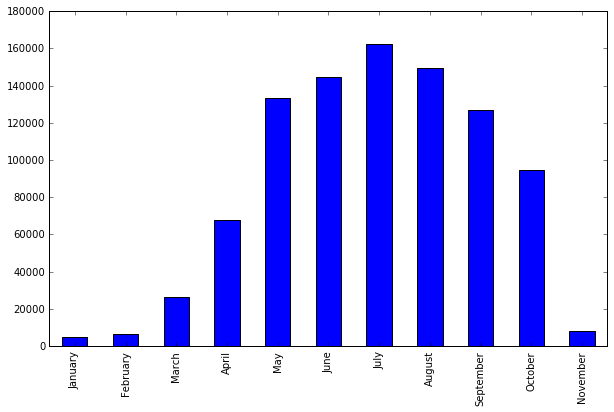

In [127]:
month_counts["Berri 1"].plot(kind='bar', figsize=(10, 6))

<br>

## Persistence

Data in a DataFrame can be saved to a file or a database. Lets look at both scenarios.

### Save to File

In [128]:
weekday_counts

,Berri 1
Monday,134298
Tuesday,135305
Wednesday,152972
Thursday,160131
Friday,141771
Saturday,101578
Sunday,99310


In [129]:
# Saves all the data including the index
weekday_counts.to_csv("datasets/bike_travel_weekday_count.csv")

In [130]:
df

,column1,column2,column3,some_random_numbers,Location
0,Allen,Varghese,Male,4200,Dublin
1,Kevin,O'Brien,Male,2750,Limerick
2,Mihai,Todor,Male,3820,Dublin


In [131]:
# Save DataFrame without index
df.to_csv("sample_dataset.csv", index=False)

### Save to Database

In [132]:
import sqlite3
db_conn = sqlite3.connect("workshop_db.sqlite")
df.to_sql("person_details", db_conn, if_exists="replace", index=False)

In [133]:
df_table = pd.read_sql("select * from person_details", db_conn)
df_table

,column1,column2,column3,some_random_numbers,Location
0,Allen,Varghese,Male,4200,Dublin
1,Kevin,O'Brien,Male,2750,Limerick
2,Mihai,Todor,Male,3820,Dublin
